### Neural network Regression
What is a regression problem?
* Prediction

What are we going to solve using this problem?
* Predict house prices!



In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

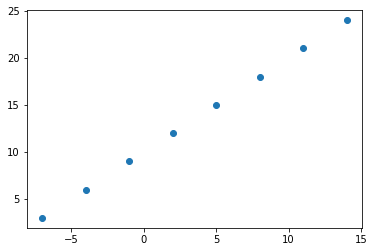

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant( [
    "bedroom",
    "bathroom",
    "garage"
] )
house_price = tf.constant( [939700] )
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0].ndim # scalars have no shape

0

In [10]:
# convert X and y into tensors 
X = tf.constant(X,dtype=tf.float64)
y = tf.constant(y,dtype=tf.float64)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - define the loss function (In other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find the patterns between X and & y (features and labels).


In [11]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model using the sequential API
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Dense(1)
#     ]
# )

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model
# we have to expand axis because it breaks in the latest version
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 220ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# attempt to predict
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function opr prehaps the **learning rate** of the optimization funciton

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it to train for longer) or on more data (give the model more examples to learn from)


Note: Learning Rate is the most important hyper parameter to improving or making our model worse

In [14]:
# modelv2 = tf.keras.Sequential()
# modelv2.add(tf.keras.layers.Dense(100, activation='relu'))
# modelv2.add(tf.keras.layers.Dense(100, activation='relu'))
# modelv2.add(tf.keras.layers.Dense(100, activation='relu'))
# modelv2.add(tf.keras.layers.Dense(1))

# # 2. compile the model
# modelv2.compile(
#     loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
#     optimizer = tf.keras.optimizers.Adam(lr=0.0001), # stochastic gradient descent (lr=1e-3)
#     metrics=['mae'] # mean absolute error
# )

# # 3. fit the model
# # we have to expand axis because it breaks in the latest version
# modelv2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


# 1. create the model using the sequential API
modelV2 = tf.keras.Sequential()
modelV2.add(tf.keras.layers.Dense(100, activation='relu'))
modelV2.add(tf.keras.layers.Dense(1))

# 2. compile the model
modelV2.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.Adam(lr=0.015), # SGD stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model
# we have to expand axis because it breaks in the latest version
modelV2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 211ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5065 - mae: 12.5065
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1337 - mae: 11.1337
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.9339 - mae: 9.9339
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7000 - mae: 8.7000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 7.4350 - mae: 7.4350
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 6.1301 - mae: 6.1301
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 4.7794 - mae: 4.7794
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 3.8049 - mae: 3.8049
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 3.9597 - mae: 3.9597
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss:

## Trained Model predicted Y Results Vs Actual Y values
In this example below we plot the trained AI guess of Y from X value vs the actual result
- **Blue** is the test data we trained the model with
- **Red** is TF model guess

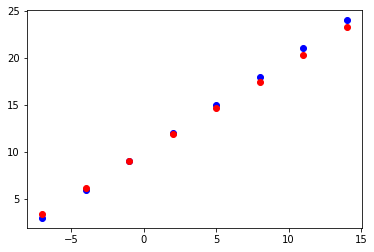

In [15]:
#modelV2.predict([17.0])
X = np.array(X,dtype=np.float64)
for i in range(0,len(X)):
    x_value = X[i]
    #print(x_value)
    # predict y value
    y_pred = modelV2.predict([x_value])

    # plot the prediction
    plt.scatter(x_value, y[i], color="blue")
    plt.scatter(x_value, y_pred, color="red")

## Data outside the Dataset
Let's see what happens if we try data outside the data set
The plots in orange are the neural networks guess thats outside the dataset
while red is still within the dataset and blue is our dataset

[-7. -4. -1.  2.  5.  8. 11. 14. 17. 20. 23. 26. 29. 32. 35. 38. 41. 44.
 47. 50. 53. 56. 59. 62. 65. 68. 71. 74. 77. 80. 83.]


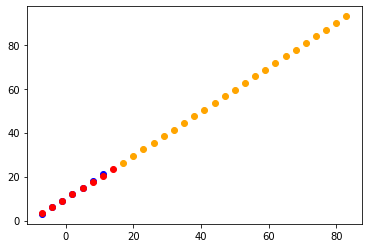

In [16]:
X = np.array(X,dtype=np.float64)
#print(X)

# modify X to add more data
v = 14.0
while True:
    v = v + 3
    #print(v)
    X = np.append(X,v)

    if v > 80:
        break
print(X)


#X.append(  )
for i in range(0,len(X)):
    x_value = X[i]
    #print(x_value)
    # predict y value
    y_pred = modelV2.predict([x_value])

    # plot the prediction
    if i < len(y)-1:
        plt.scatter(x_value, y[i], color="blue")
    
    # show what is outside the data set
    if i > len(y)-1:
        plt.scatter(x_value, y_pred, color="orange")
    else:
        plt.scatter(x_value, y_pred, color="red")

## Evaluating a model
In practice, a typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model, REPEAT
```
When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, Visualize, Visualize!"

Its a good idea to visualize:
* the data that we are working with
* the model its self? what does it look like? how does the data go through it?
* the training of a model? how does it perform as it learns what happens to the data?
* The predictions of a trained model?? was it better or worse, What factors changed it?


In [17]:
# lets make a bigger dataset
X = tf.range( -100, 100, 4 )
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [18]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

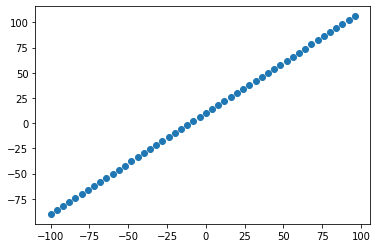

In [19]:
plt.scatter(X,y)

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model is trained on this data, which is typically 10-15% of the data available. 
* **Test set** - the model gets evaluated on this data to test what has been learned, this set is typically 10-15% of the total data available.

-> sounds like the hold out method

This method of training is called generalization, Why do this? 
`We want our model to perform on data it has't seen before.`

In [20]:
# how many samples do we have
len(X)

50

In [21]:
# split the data into train and test sets
X_train = X[:int(len(X)*0.8)] # 80% of the data
y_train = y[:int(len(y)*0.8)] # 80% of the data

X_test = X[int(len(X)*0.8):] # 20% of the data
y_test = y[int(len(y)*0.8):] # 20% of the data

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

## Visualizing the data 
Now we've got our data in training and test sets... let's visualize it again!

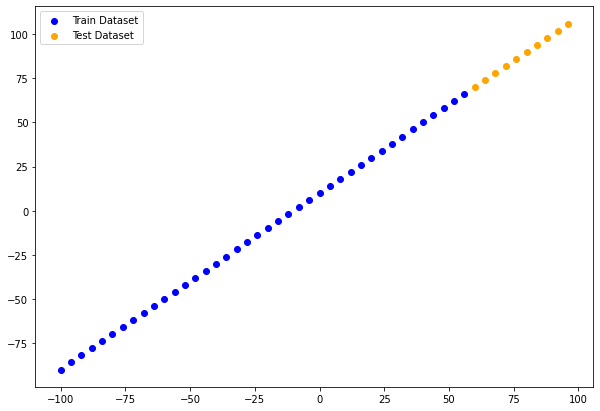

In [22]:
plt.figure(figsize=(10,7))

# plot the training data
plt.scatter(X_train, y_train, color="blue", label="Train Dataset") # our model will learn on this

# plot the test data
plt.scatter(X_test, y_test, color="orange", label="Test Dataset") # our model will improve on this data 

# show the legend
plt.legend()

In [23]:
# Let's have a look on building neural network for our data
# 1. create the model using the sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
#model.add(tf.keras.layers.Dense(100, activation='relu'))

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model (Important note we are fitting on the training data only)
#model.fit(X_train, Y_train, epochs=100)

## Visualizing the model
In the error given below we must pre-define an input shape for the array so it can be built for module summary
This also can be done if we git the data with data for the model to train.

In [24]:
#model.build(input_shape=(1,1))
#model.summary()

In [25]:
# Let's have a look on building neural network for our data
# 1. create the model using the sequential API
model = tf.keras.Sequential(name = "model_3_sets") # note the model names and layer names must meet regex to have underscores no spaces
model.add(tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))
#model.add(tf.keras.layers.Dense(100, activation='relu'))

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

#model.build()
model.summary()

# 3. fit the model (Important note we are fitting on the training data only)
#model.fit(X_train, Y_train, epochs=100)

Model: "model_3_sets"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

In [26]:
# Let's fit our model to the training data

# 3. fit the model (Important note we are fitting on the training data only)
model.fit(X_train, y_train, epochs=100, verbose=0)

In [27]:
# get the summary of our model
model.summary()

Model: "model_3_sets"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


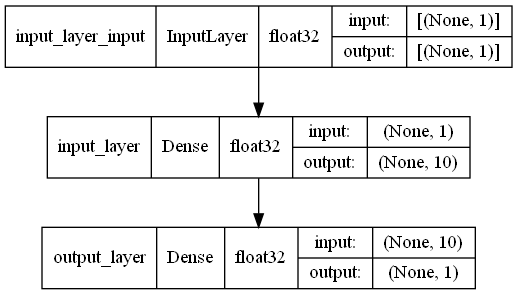

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, show_dtype=True)#, to_file='model.png')

## Visualizing our model's predictions
To visualize predictions, its a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [29]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 90.92919 ],
       [ 96.86788 ],
       [102.806564],
       [108.745255],
       [114.683945],
       [120.62263 ],
       [126.56132 ],
       [132.5     ],
       [138.43869 ],
       [144.37738 ]], dtype=float32)

In [30]:
y_test # if the y_pred is not the same as the y_test then the model is not working

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into function

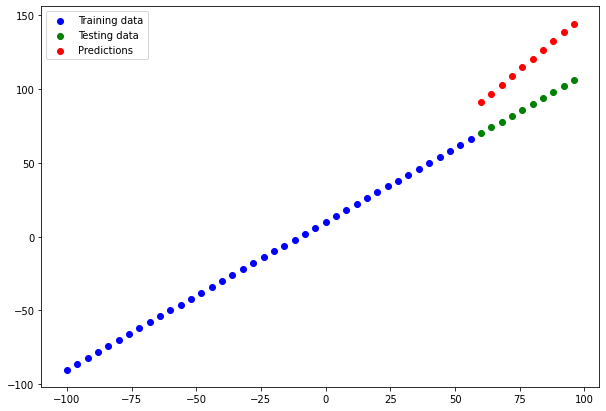

In [31]:
def plot_predictions(
    train_data=X_train, 
    train_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - Mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [32]:
# Evaluate the model on test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 70ms/step - loss: 29.6533 - mae: 29.6533


[29.653284072875977, 29.653284072875977]

In [33]:
# we need to squeeze the data to make it a 1D array
# this is because if we ever do any math functions on matrices they need to the same size
y_pred = tf.squeeze(y_pred)

# Calculate the mean absolute error with TF
tf.metrics.mean_absolute_error(y_test, y_pred)


<tf.Tensor: shape=(), dtype=float32, numpy=29.653284>

In [34]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.92919 ,  96.86788 , 102.806564, 108.745255, 114.683945,
       120.62263 , 126.56132 , 132.5     , 138.43869 , 144.37738 ],
      dtype=float32)>

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [36]:
# Calculate the mean square error
tf.metrics.mean_squared_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=910.325>

In [37]:
# Calculate the Huber loss
tf.keras.losses.huber(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=29.153284>

### Running experments to improve our model
```
Building a model -> fit it -> evaluate it -> tweak it

fit it -> evaluate it -> tweak it -> REPEAT

```

Machine learning practitioner is Experiment, Experiment, Experiment!

1. Get more data
2. Make the model larger (complex model)
3. Train for longer

Let's do 3 modelling experiments:
1. `model_1` same as the original model, 1 layer, trained for 100 epochs
2. `model_2` 2 layers, trained for 100 epochs,
3. `model_3` 2 layers, trained for 500 epochs.

**Build `model_1`**

In [38]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model using the sequential API
model_1 = tf.keras.Sequential(name = "model_1") # note the model names and layer names must meet regex to have underscores no spaces
model_1.add(tf.keras.layers.Dense(1, input_shape=(1,), name="input_layer"))

# 2. compile the model
model_1.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model (Important note we are fitting on the training data only)
model_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 993us/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 1000us/ste

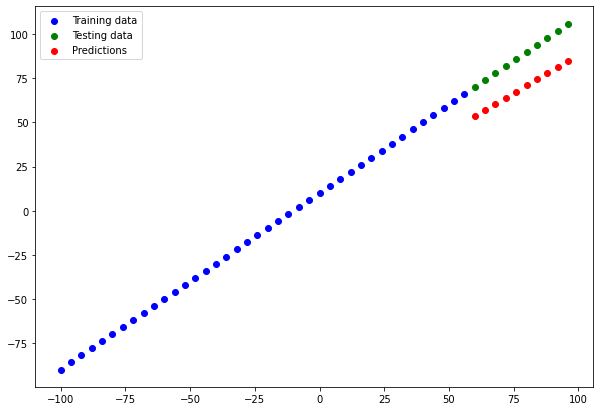

In [39]:
# make and plot predictions for this model
y_preds_1 = model_1.predict(X_test)

plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds_1
)

In [40]:
# Calculate model_1 evaluation metrics
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [41]:
# 1. create the model using the sequential API
model_2 = tf.keras.Sequential(name = "model_2") # note the model names and layer names must meet regex to have underscores no spaces
model_2.add(tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer"))
model_2.add(tf.keras.layers.Dense(1, name="output_layer"))

# 2. compile the model
model_2.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model (Important note we are fitting on the training data only)
model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 73.0019 - mae: 73.0019
Epoch 2/100
2/2 [==============================] - 0s 985us/step - loss: 17.5325 - mae: 17.5325
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 20.4862 - mae: 20.4862
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 13.1871 - mae: 13.1871
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 14.5492 - mae: 14.5492
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6087 - mae: 11.6087
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 12.6668 - mae: 12.6668
Epoch 8/100
2/2 [==============================] - 0s 1000us/step - loss: 11.0468 - mae: 11.0468
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 39.7317 - mae: 39.7317
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 27.2189 - mae: 27.2189
Epoch 11/100
2/2 [==============================] - 0s

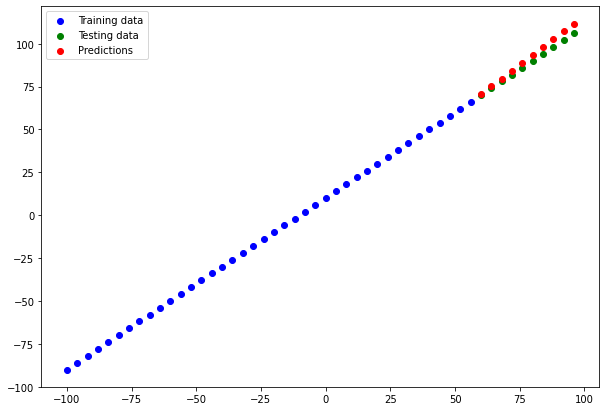

In [42]:
# make and plot predictions for this model
y_preds_2 = model_2.predict(X_test)

plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds_2
)

In [43]:
# Calculate model_2 evaluation metrics
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1110053>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497129>)

**Build `model_3`**
* 2 dense layers, for 500 epochs

In [44]:
# 1. create the model using the sequential API
model_3 = tf.keras.Sequential(name = "model_3") # note the model names and layer names must meet regex to have underscores no spaces
model_3.add(tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer"))
model_3.add(tf.keras.layers.Dense(1, name="output_layer"))

# 2. compile the model
model_3.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(lr=0.001), # NOTE: we added a lr rate because our model was overfitting
    metrics=['mae'] # mean absolute error
)

# 3. fit the model (Important note we are fitting on the training data only)
model_3.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 19.8763 - mae: 19.8763

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step - loss: 18.8293 - mae: 18.8293
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 11.4742 - mae: 11.4742
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 8.3273 - mae: 8.3273
Epoch 4/500
2/2 [==============================] - 0s 993us/step - loss: 8.4104 - mae: 8.4104
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 7.8010 - mae: 7.8010
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 7.5729 - mae: 7.5729
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 7.6338 - mae: 7.6338
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 7.9006 - mae: 7.9006
Epoch 9/500
2/2 [==============================] - 0s 999us/step - loss: 9.3599 - mae: 9.3599
Epoch 10/500
2/2 [==============================] - 0s 694us/step - loss: 9.1792 - mae: 9.1792
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 8.4585 - 

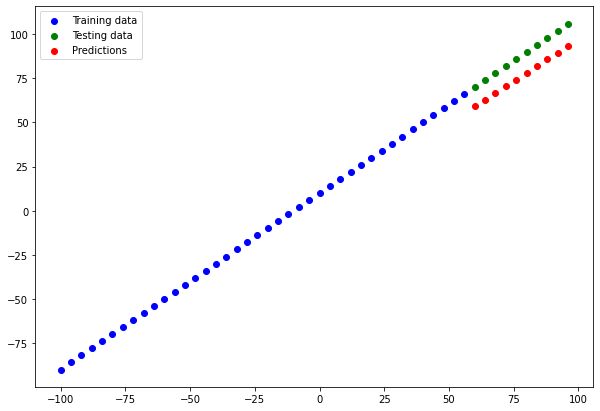

In [45]:
# plot the predictions
y_preds_3 = model_3.predict(X_test)

# plot predictions
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds_3
)

In [46]:
# Calculate model_3 evaluation metrics
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=11.819999>,
 <tf.Tensor: shape=(), dtype=float32, numpy=140.06717>)

### Comparing the results of our experiments
We've run a few experiments, let's compare the results

https://youtu.be/tpCFfeUEGs8?t=24707

In [47]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd

model_results = pd.DataFrame(
    [
        ["Model 1", mae_1.numpy(), mse_1.numpy()],
        ["Model 2", mae_2.numpy(), mse_2.numpy()],
        ["Model 3", mae_3.numpy(), mse_3.numpy()]
    ], 
    columns=["Model", "Mean Absolute Error", "Mean Squared Error"]
)
model_results

,Model,Mean Absolute Error,Mean Squared Error
0,Model 1,18.745327,353.573364
1,Model 2,3.111005,12.497129
2,Model 3,11.819999,140.067169


### Model 2 seems to be the best out of the 3 models
Machine learning is about figuring which models is the best and which models are the worst
Machine learning modelling is trying different combinations to find the best.

Note: we used a small model to test and experiment which model are the best and worst. We do this because we want to figure out what works and doesnt
If we did this on a huge model it would take a crazy amount of time to compare the models and find the best.

Remember start small then go bigger!


In [48]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if youre running lots of experiments.

Luckily, there are tools to help us !

**Resource:** as your build more models, you'll want to look into using

* TensorBoard - a component of the Tensorflow library to help track modelling experiments (well see this one later)
* Weights * biases - a tool for tracking all of kinds of machine learning experiments (plugs into tensor board)

## Saving our models
Saving our models allow us to use them outside of the training area.

There are checkpoint saving for models for long training with larger datasets (Remember seeing this being used for a TTS model being trained in large epochs)
There is also directly saving a fully trained model at once

There are 2 formats to save our models in:
* SavedModel format
* HDF5 Format

If we include the optimizer we can resume training from where we left.

In [51]:
# save our model_2 using the savedmodel format
model_2.save(
    filepath = "./trained_models/best_model_savedmodel_format",
    include_optimizer = True,
)


INFO:tensorflow:Assets written to: ./trained_models/best_model_savedmodel_format\assets


In [52]:
# save our model_2 using HDF5 format
model_2.save(
    filepath = "./trained_models/best_model_hdf5.h5",
    include_optimizer = True,
)

## Loading in a saved model


In [53]:
# load in our model from the savedmodel format
loaded_savedmodel_format = tf.keras.models.load_model(
    filepath = "./trained_models/best_model_savedmodel_format"
)

loaded_savedmodel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [56]:
# compare model_2 predictions with the saved model predictions
y_preds_2_savedmodel_format = loaded_savedmodel_format.predict(X_test)
model_2_preds = model_2.predict(X_test)

model_2_preds == y_preds_2_savedmodel_format

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
# load in the model using the HDF5 format
loaded_hdf5_format = tf.keras.models.load_model(
    filepath = "./trained_models/best_model_hdf5.h5"
)

loaded_hdf5_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [58]:
# compare model_2 predictions with the loaded hdsf5 model predictions
y_preds_2_hdf5_format = loaded_hdf5_format.predict(X_test)
model_2_preds = model_2.predict(X_test)
model_2_preds == y_preds_2_hdf5_format

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])